Text(0, 0.5, 'Rel. Disp. (cm)')

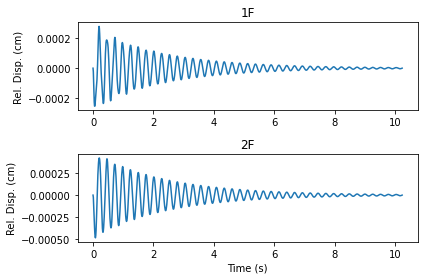

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from frame2d import mdofpy


# define imput ground motion (impulse excitation)
acc = np.zeros((1024, 1))
acc[1, 0] = 1  # first element acc[0,:] should be zero

# define stiffness and mass (2-DOF)
k1 = 34300000  # N/m
k2 = 25500000  # N/m
K = np.array([[k1 + k2, -k2], [-k2, k2]])
M = np.diag([20000, 20000])  # kg

# eigenvalue analysis
eig, _ = np.linalg.eig(np.linalg.inv(M) @ K)
omeg = np.sqrt(eig)

# define damping matrix (stiffness-propotional)
zeta = 0.02
C = 2 * zeta / omeg * K

# make MDOF object
mdof = mdofpy.Mdof(M, C, K)

# excite & record
rc = mdofpy.excite_mdof_linear(mdof, 0.01, acc)

# plot
fig, ax = plt.subplots(2, 1, tight_layout = True)
ax[0].plot(rc.tim, rc.dis[:,0])
ax[1].plot(rc.tim, rc.dis[:,1])
ax[0].set_title('1F')
ax[1].set_title('2F')
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Rel. Disp. (cm)')
ax[1].set_ylabel('Rel. Disp. (cm)')